<a href="https://colab.research.google.com/github/aakashjain824/Deep-learning/blob/main/artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# Import the dataset
df = pd.read_csv("/content/drive/MyDrive/Data Science/Deep Learning/Section 39 - Artificial Neural Networks (ANN)/Python/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [60]:
# Rownumber, customerid and surname is not required
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [61]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [63]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

We use ColumnTransformer because onehotencoder apply OHE on all columns inlcluding numeric columns as well. on the other hand ColumnTransformer which applies different transformation on numeric and categorical variables. Sparse = False means we want  numpy array instead of sparse matrix

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))


In [65]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [66]:
X[0,:] # Notice that OHE output is first 3 columns and credit score moved to 4th position

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

### Splitting the dataset into the Training set and Test set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

### Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

## Part 2 - Building the ANN

### Initializing the ANN

In [71]:
ann = tf.keras.models.Sequential()
ann

### Adding the input layer and the first hidden layer

#Dense layer

is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

In [72]:
# We will create a Dense layer units(no. of neurons(hyperparameter))

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the second hidden layer

In [73]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the output layer

In [74]:
# output is binary so we will use only 1 unit. in case of 3 outputs we will need 3 as 0,0,1, 0,1,0 1,0,0
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

#Adam optimization
is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [75]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics=['accuracy'])

### Training the ANN on the Training set

In [76]:
# batch learning
#Epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.7894 - accuracy: 0.4849
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7956
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.8073
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4383 - accuracy: 0.8150
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.8190
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8179
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8223
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8251
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3955 - accuracy: 0.8314
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3842 - accura

## Part 4 - Making the predictions and evaluating the model

In [ ]:
y_pred.shape, y_test.shape

In [100]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

np.concatenate((y_pred,y_test.reshape(len(y_test),1)),1)

63/63 [==============================] - 0s 1ms/step


array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

Making the confusion matrix

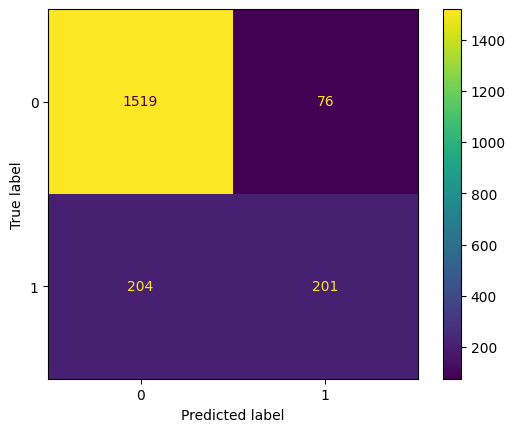

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred
)

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [107]:
(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5).astype(int)

1/1 [==============================] - 0s 26ms/step


array([[0]])